In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error


In [19]:
df = pd.read_csv("Data/final_prediction.csv")

In [33]:
naive_predictions = ((1 + df["Bitcoin % Naive Prediction (1 Days)"]) * df["Value"]).shift(1).dropna()
advanced_predictions = ((1 + df["Bitcoin % Final Prediction (1 Days)"]) * df["Value"]).shift(1).dropna()

In [21]:
naive_rmse = mean_squared_error(df["Value"][-len(naive_predictions):], naive_predictions, squared=False)
advanced_rmse = mean_squared_error(
    df["Value"][-len(advanced_predictions):], advanced_predictions, squared=False)


In [60]:
df["Date"] = pd.to_datetime(df["Date"])

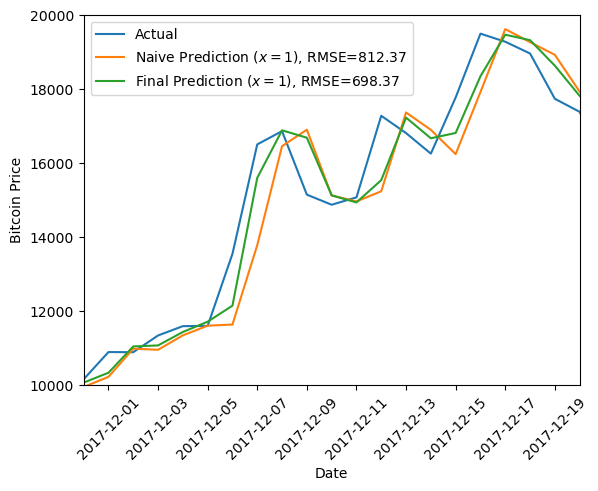

In [69]:
plt.plot(df[["Value"]].set_index(df["Date"]), label="Actual")
plt.plot(pd.Series(naive_predictions.values, index=df["Date"][-len(naive_predictions):]), label=f"Naive Prediction ($x=1$), RMSE={naive_rmse:.2f}")
plt.plot(pd.Series(advanced_predictions.values, index=df["Date"][-len(advanced_predictions):]),
         label=f"Final Prediction ($x=1$), RMSE={advanced_rmse:.2f}")
plt.xlim(17500, 17520)
plt.ylim(10000, 20000)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()

In [58]:
# df["Date"][-len(naive_predictions):]
# naive_predictions.values

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(sell, df["Value"][sell], c="red", s=20, label="Sell")
plt.scatter(buy, df["Value"][buy], c="green", s=20, label="Buy")
plt.plot(df["Value"], label="Bitcoin Price")
plt.legend()
plt.show()


,Date,Value,USD (PM),Bitcoin % Change,Gold % Change,Bitcoin % Naive Prediction (1 Days),Bitcoin % Naive Prediction (3 Days),Bitcoin % Naive Prediction (5 Days),Bitcoin % Naive Prediction (10 Days),30-day Bitcoin SMA,...,Gold MACD Histogram,Bitcoin Momentum,Gold Momentum,Bitcoin RSI,Gold RSI,RAT,Bitcoin % Final Prediction (1 Days),Bitcoin % Final Prediction (3 Days),Bitcoin % Final Prediction (5 Days),Bitcoin % Final Prediction (10 Days)
0,2016-09-11,621.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-09-12,609.67,1324.60,-0.019271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.026725,NaN,NaN,NaN,NaN
2,2016-09-13,610.92,1323.65,0.002050,-0.000717,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.154195,NaN,NaN,NaN,NaN
3,2016-09-14,608.82,1321.75,-0.003437,-0.001435,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.061661,NaN,NaN,NaN,NaN
4,2016-09-15,610.38,1310.80,0.002562,-0.008284,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.565456,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,51769.06,1821.60,0.036472,-0.000384,0.008257,0.009129,0.014483,0.017964,47543.381333,...,2.528305,4806.26,23.1000,66.704172,62.508540,2841.955424,0.009094,-0.001046,0.068530,0.179479
1822,2021-09-07,52677.40,1802.15,0.017546,-0.010677,0.000521,0.006577,0.004298,0.014029,47811.490333,...,0.806886,3620.54,-0.4375,68.802835,49.652142,2923.030824,-0.001864,0.000942,0.061960,0.146689
1823,2021-09-08,46809.17,1786.00,-0.111399,-0.008962,0.002808,0.006821,0.010326,0.015082,47911.258000,...,-1.409096,-2088.48,-20.6750,47.828673,41.938935,2620.894177,0.010957,0.020935,-0.009015,0.051667
1824,2021-09-09,46078.38,1788.25,-0.015612,0.001260,0.001343,0.004288,0.002936,0.011287,47902.755333,...,-2.641438,-2728.40,-22.5125,45.950072,43.261359,2576.730323,-0.006739,0.009697,0.027534,-0.036438
